<a href="https://colab.research.google.com/github/kibarmustofa/2341720034_ML_2025/blob/main/KUIS1/KUIS1_2341720034_Kibar_Mustofa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [ ]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Data Size
df.shape

(48842, 15)

In [ ]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

print("Informasi Umum Dataset:")
df.info()

print("\n" + "="*50 + "\n")

# 2. Menghitung nilai yang hilang (missing value) pada setiap variabel
#df.isnull().sum() #bisa menggunakan baris berikut jika ingin melihat tabel keseluruhan

#hanya menampilkan data yang hilang
missing_values = df.isnull().sum()
print("Jumlah Nilai yang Hilang per Variabel:")
print(missing_values[missing_values > 0])

Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Jumlah Nilai yang Hilang per Variabel:
workclass         963
occupa

## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# 1. Lakukan proses data imputation


# Mengisi nilai yang hilang dengan modus (nilai yang paling sering muncul)
for col in ['workclass', 'occupation', 'native-country']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Nilai hilang pada kolom '{col}' telah diisi dengan modus: '{mode_value}'")

print("\n" + "="*50 + "\n")

# 2. Cek kembali apakah masih terdapat data yang hilang
print("Pengecekan Ulang Nilai yang Hilang Setelah Imputasi:")
print(df.isnull().sum())
df.info

Nilai hilang pada kolom 'workclass' telah diisi dengan modus: 'Private'


/tmp/ipython-input-3825674279.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Nilai hilang pada kolom 'occupation' telah diisi dengan modus: 'Prof-specialty'
Nilai hilang pada kolom 'native-country' telah diisi dengan modus: 'United-States'


Pengecekan Ulang Nilai yang Hilang Setelah Imputasi:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


<bound method DataFrame.info of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64           Private  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed     Prof-specialty  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  income  
0      United-States   <=50K  
1      United-States   <=50K  
2      United-States   <=50K  
3      United-States   <=50K  
4               Cuba   <=50K  
...              ...     ...  
48837  United-States  <=50K.  
48838  United-States  <=50K.  
48839  United-States  <=50K.  
48840  United-States  <=50K.  
48841  United-States   >50K.  

[48842 rows x 15 columns]>

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Inspeksi fitur kualitatif
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"--- Nilai Unik pada Kolom '{col}' ---")
    df[col] = df[col].replace('?', 'Others')
    print(df[col].value_counts())
    print("\n")


# Membersihkan duplikasi/kesalahan penulisan di kolom 'income'
print("--- Membersihkan Kolom 'income' ---")
df['income'] = df['income'].replace({
    '<=50K.': '<=50K',
    '>50K.': '>50K'
})


# 3. Verifikasi hasil pembersihan 'income'
print("\nHasil akhir setelah pembersihan kolom 'income':")
print(df['income'].value_counts())


--- Nilai Unik pada Kolom 'workclass' ---
workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Others               1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


--- Nilai Unik pada Kolom 'education' ---
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


--- Nilai Unik pada Kolom 'marital-status' ---
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Marrie

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

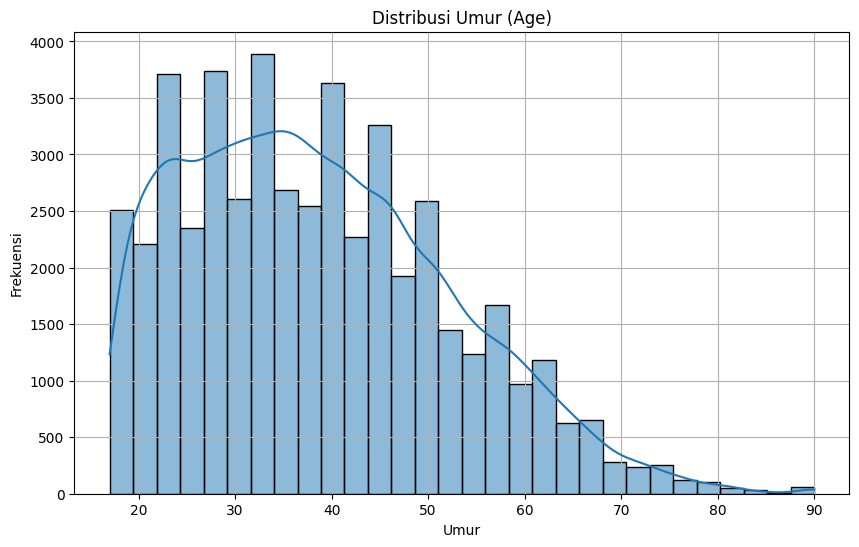

In [ ]:
# Jawab 1.1 - Histrogram
# 1. Histogram untuk kolom 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribusi Umur (Age)')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

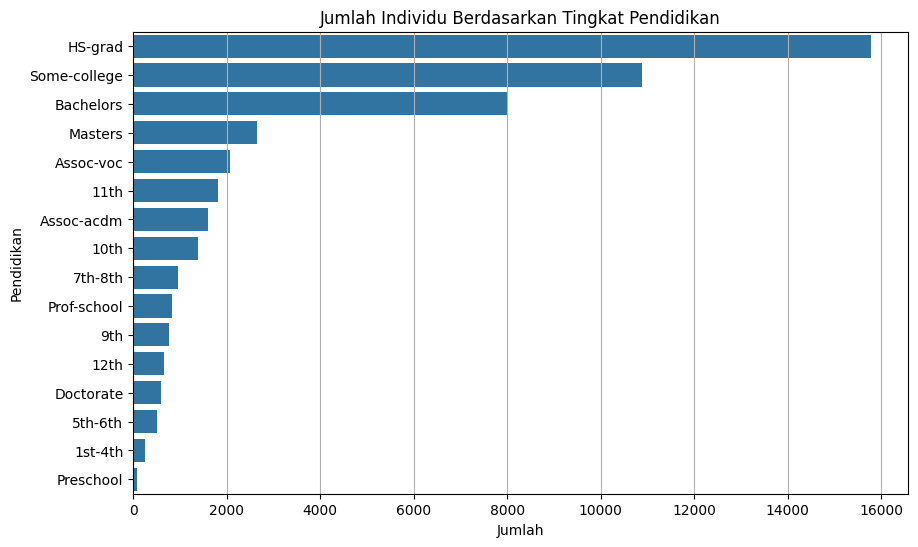

In [ ]:
# Jawab 1.2 - Barchart
# 2. Barchart untuk kolom 'education'
plt.figure(figsize=(10, 6))
sns.countplot(y=df['education'], order=df['education'].value_counts().index)
plt.title('Jumlah Individu Berdasarkan Tingkat Pendidikan')
plt.xlabel('Jumlah')
plt.ylabel('Pendidikan')
plt.grid(True, axis='x')
plt.show()

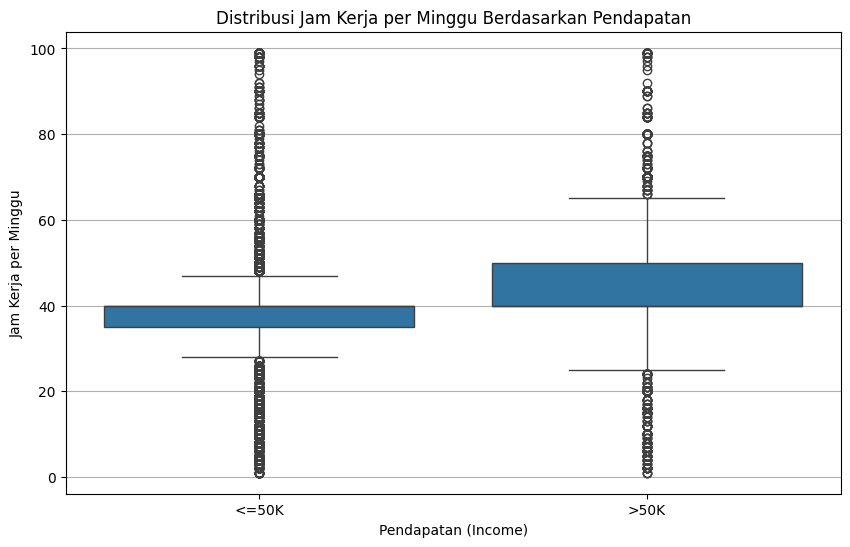

In [ ]:
# Jawab 1.3 - Boxplot
# 3. Boxplot 'income' terhadap 'hours_per_week'
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Distribusi Jam Kerja per Minggu Berdasarkan Pendapatan')
plt.xlabel('Pendapatan (Income)')
plt.ylabel('Jam Kerja per Minggu')
plt.grid(True, axis='y')
plt.show()

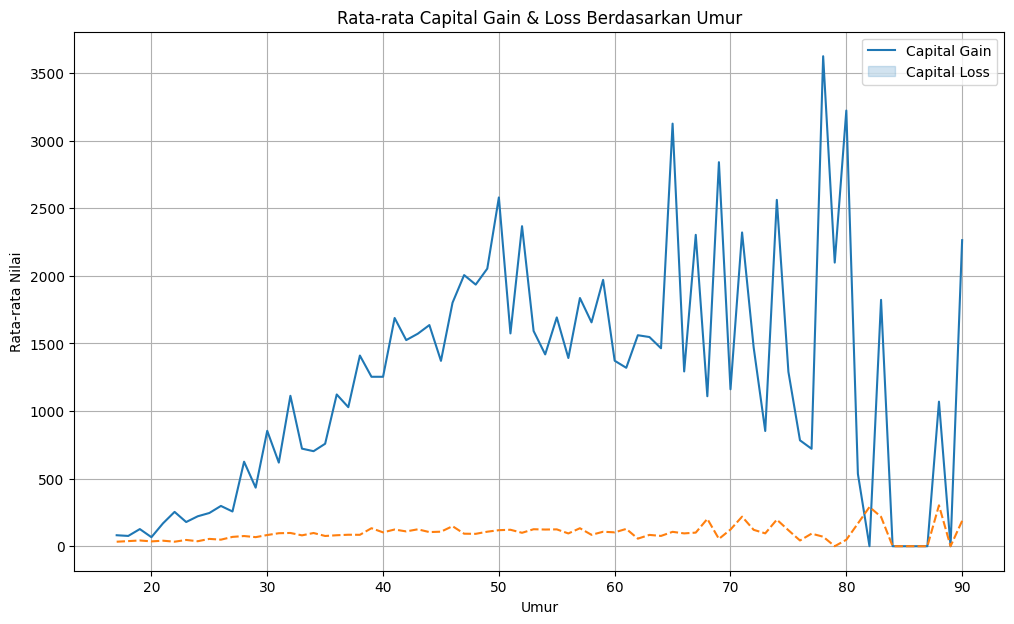

In [ ]:
# Jawab 1.4 - Lineplot
# 4. Lineplot 'age' terhadap 'capital-gain' dan 'capital-loss'
age_analysis = df.groupby('age')[['capital-gain', 'capital-loss']].mean()

plt.figure(figsize=(12, 7))
sns.lineplot(data=age_analysis)
plt.title('Rata-rata Capital Gain & Loss Berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Rata-rata Nilai')
plt.legend(['Capital Gain', 'Capital Loss'])
plt.grid(True)
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
1. Distribusi data 'age' menunjukkan distribusi miring ke kanan,
Artinya sebagian besar populasi dari data ini terkonsentrasi pada usia muda hingga dewasa (sekitar 20-50 tahun),
dengan jumlah individu yang menurun seiring bertambahnya usia. Puncak distribusi berada di sekitar usia 30-40 tahun,
yang merupakan usia produktif.

2.karena distribusi data 'age' tidak simetris (miring ke kanan).
Penggunaan rata-rata jadi sangat terpengaruh oleh usia yang tua, jadi penggunaan median menurut saya lebih cocok,
karena akan memperoleh nilai yang lebih stabil.

3.Berdasarkan perhitungan di atas, kategori dengan outlier terbanyak adalah (<=50K).
Ini menunjukkan bahwa pada kelompok berpenghasilan lebih rendah memiliki
variasi jam kerja per minggu yang sangat tinggi
'''

# Menghitung jumlah outlier pada 'hours-per-week' per kategori 'income'
outliers = {}
for income_category in df['income'].unique():
    subset = df[df['income'] == income_category]['hours-per-week']
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = subset[(subset < lower_bound) | (subset > upper_bound)].shape[0]
    outliers[income_category] = outlier_count

outliers_count = pd.Series(outliers)
print("Jumlah Outlier 'hours-per-week' per Kategori Income:")
print(outliers_count)

# Menentukan kategori dengan outlier terbanyak
most_outliers_category = outliers_count.idxmax()
print(f"\nKategori dengan outlier terbanyak pada 'hours-per-week' adalah: '{most_outliers_category}' dengan {outliers_count.max()} outlier.")



Jumlah Outlier 'hours-per-week' per Kategori Income:
<=50K    11706
>50K       781
dtype: int64

Kategori dengan outlier terbanyak pada 'hours-per-week' adalah: '<=50K' dengan 11706 outlier.


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# Encoding kolom 'sex'
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Encoding kolom 'income'
df['income'] = df['income'].map({'>50K': 1, '<=50K': 0})

# Tampilkan hasil encoding pada 5 baris pertama
print("Hasil Encoding pada kolom 'sex' dan 'income':")
df[['sex', 'income']].head()

Hasil Encoding pada kolom 'sex' dan 'income':


,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

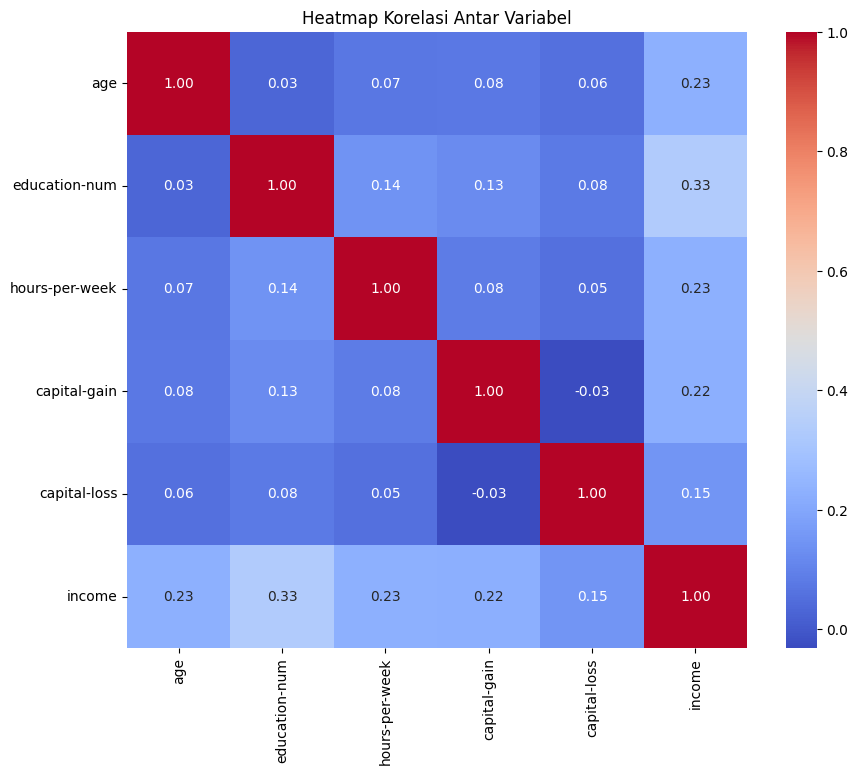


Matriks Korelasi:
                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.230369       0.332613        0.227687      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054467  0.227687  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# 1. Lakukan analisis korelasi
correlation_cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
correlation_matrix = df[correlation_cols].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

# Tampilkan matriks korelasi
print("\nMatriks Korelasi:")
print(correlation_matrix)

In [ ]:
# Hasil analisis jelaskan pada cell ini
'''
1. Korelasi Positif dengan income:

education-num (0.34): Ini adalah korelasi positif terkuat dengan income. Artinya, semakin tinggi tingkat pendidikan formal seseorang, semakin besar kemungkinannya untuk memiliki pendapatan di atas 50K.

age (0.23): Usia juga memiliki korelasi positif. Semakin tua seseorang (hingga usia produktif), cenderung semakin tinggi pendapatannya, yang mungkin связано dengan pengalaman kerja.

hours-per-week (0.23): Jumlah jam kerja per minggu juga berkorelasi positif. Orang yang bekerja lebih banyak jam cenderung memiliki pendapatan lebih tinggi.

capital-gain (0.22): Keuntungan modal menunjukkan korelasi positif, yang logis karena pendapatan tinggi seringkali berkorelasi dengan investasi.

2. Korelasi Antar Fitur:

Terdapat korelasi positif lemah antara age dan hours-per-week (0.07), yang mungkin menunjukkan bahwa orang di usia produktif cenderung bekerja lebih banyak jam.

kesimpulan:  tingkat pendidikan (education-num) adalah prediktor terkuat untuk pendapatan tinggi di antara variabel-variabel yang dianalisis.
'''

'\n1. Korelasi Positif dengan income:\n\neducation-num (0.34): Ini adalah korelasi positif terkuat dengan income. Artinya, semakin tinggi tingkat pendidikan formal seseorang, semakin besar kemungkinannya untuk memiliki pendapatan di atas 50K.\n\nage (0.23): Usia juga memiliki korelasi positif. Semakin tua seseorang (hingga usia produktif), cenderung semakin tinggi pendapatannya, yang mungkin связано dengan pengalaman kerja.\n\nhours-per-week (0.23): Jumlah jam kerja per minggu juga berkorelasi positif. Orang yang bekerja lebih banyak jam cenderung memiliki pendapatan lebih tinggi.\n\ncapital-gain (0.22): Keuntungan modal menunjukkan korelasi positif, yang logis karena pendapatan tinggi seringkali berkorelasi dengan investasi.\n\n2. Korelasi Antar Fitur:\n\nTerdapat korelasi positif lemah antara age dan hours-per-week (0.07), yang mungkin menunjukkan bahwa orang di usia produktif cenderung bekerja lebih banyak jam.\n\nkesimpulan:  tingkat pendidikan (education-num) adalah prediktor terk

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [ ]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


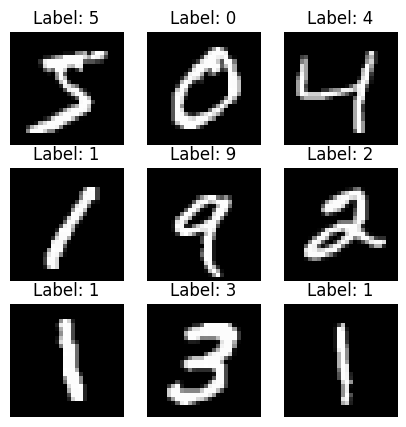

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Bentuk data setelah upsampling: (10000, 32, 32)


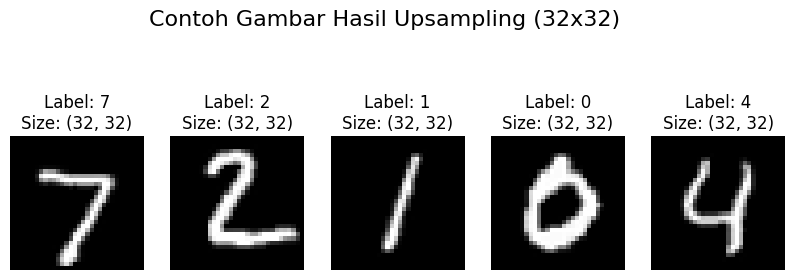

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Install OpenCV jika belum ada
!pip install -q opencv-python

import cv2

# 1. Lakukan proses upsampling
# Siapkan array kosong untuk menampung hasil resize
X_test_resized = np.zeros((X_test.shape[0], 32, 32))

# Lakukan perulangan untuk me-resize setiap gambar
for i in range(X_test.shape[0]):
    X_test_resized[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Bentuk data setelah upsampling:", X_test_resized.shape)

# 2. Tampilkan 5 data hasil upsampling
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_resized[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}\nSize: {X_test_resized[i].shape}")
    plt.axis("off")
plt.suptitle("Contoh Gambar Hasil Upsampling (32x32)", fontsize=16)
plt.show()

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Nilai piksel minimum setelah normalisasi: 0.0
Nilai piksel maksimum setelah normalisasi: 1.0


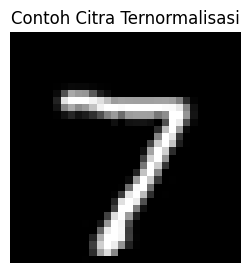

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Lakukan normalisasi pada data yang sudah di-resize
X_test_normalized = X_test_resized / 255.0

# Cek nilai min dan max setelah normalisasi untuk memastikan
print(f"Nilai piksel minimum setelah normalisasi: {X_test_normalized.min()}")
print(f"Nilai piksel maksimum setelah normalisasi: {X_test_normalized.max()}")

# Tampilkan contoh gambar yang sudah dinormalisasi (visual tidak akan berubah)
plt.figure(figsize=(3,3))
plt.imshow(X_test_normalized[0], cmap='gray')
plt.title("Contoh Citra Ternormalisasi")
plt.axis("off")
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# Siapkan holder array kosong (opsional, bisa langsung reshape)
# num_images = X_test_normalized.shape[0]
# flattened_dim = X_test_normalized.shape[1] * X_test_normalized.shape[2]
# X_test_flattened = np.zeros((num_images, flattened_dim))

# Cara yang lebih efisien adalah langsung menggunakan reshape
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Cek bentuk array setelah di-flatten
print("Bentuk asli data:", X_test_normalized.shape)
print("Bentuk data setelah di-flatten:", X_test_flattened.shape)

# Tampilkan 10 elemen pertama dari gambar pertama yang sudah di-flatten
print("\nContoh 10 elemen pertama dari satu gambar yang sudah di-flatten:")
print(X_test_flattened[0, :10])

Bentuk asli data: (10000, 32, 32)
Bentuk data setelah di-flatten: (10000, 1024)

Contoh 10 elemen pertama dari satu gambar yang sudah di-flatten:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
